Supervised Machine Learning

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')


In [127]:
df = pd.read_csv('/content/breast_cancer.csv')

In [128]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [129]:
df.shape

(569, 33)

In [130]:
# DATA PREPROCESSING

df.diagnosis.value_counts()
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [131]:
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


M ---> malignant (cancerous)

B ---> benign (not cancerous)

In [132]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [134]:
## missing Value

df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<Axes: >

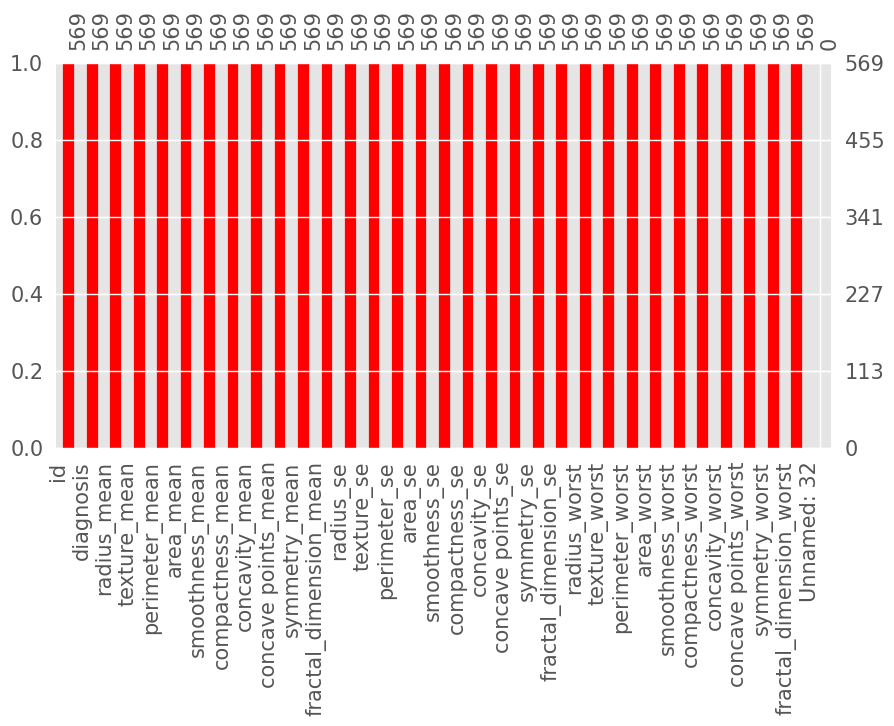

In [135]:
ms.bar(df, color='red', figsize=(10,5), fontsize=15, labels=True, label_rotation=90)

Ther is no missing value in the Dataset

In [136]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

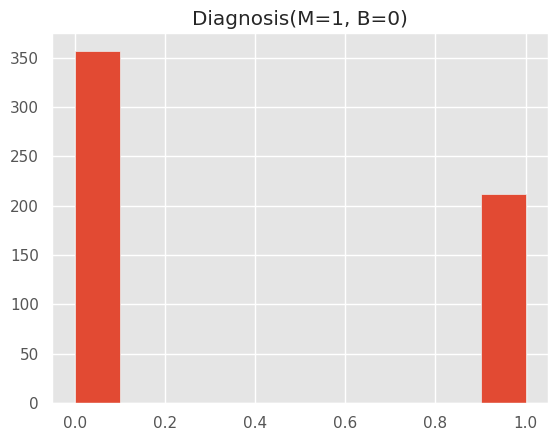

In [137]:
# check dataset is balanced or not

plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

In [138]:
## EDA



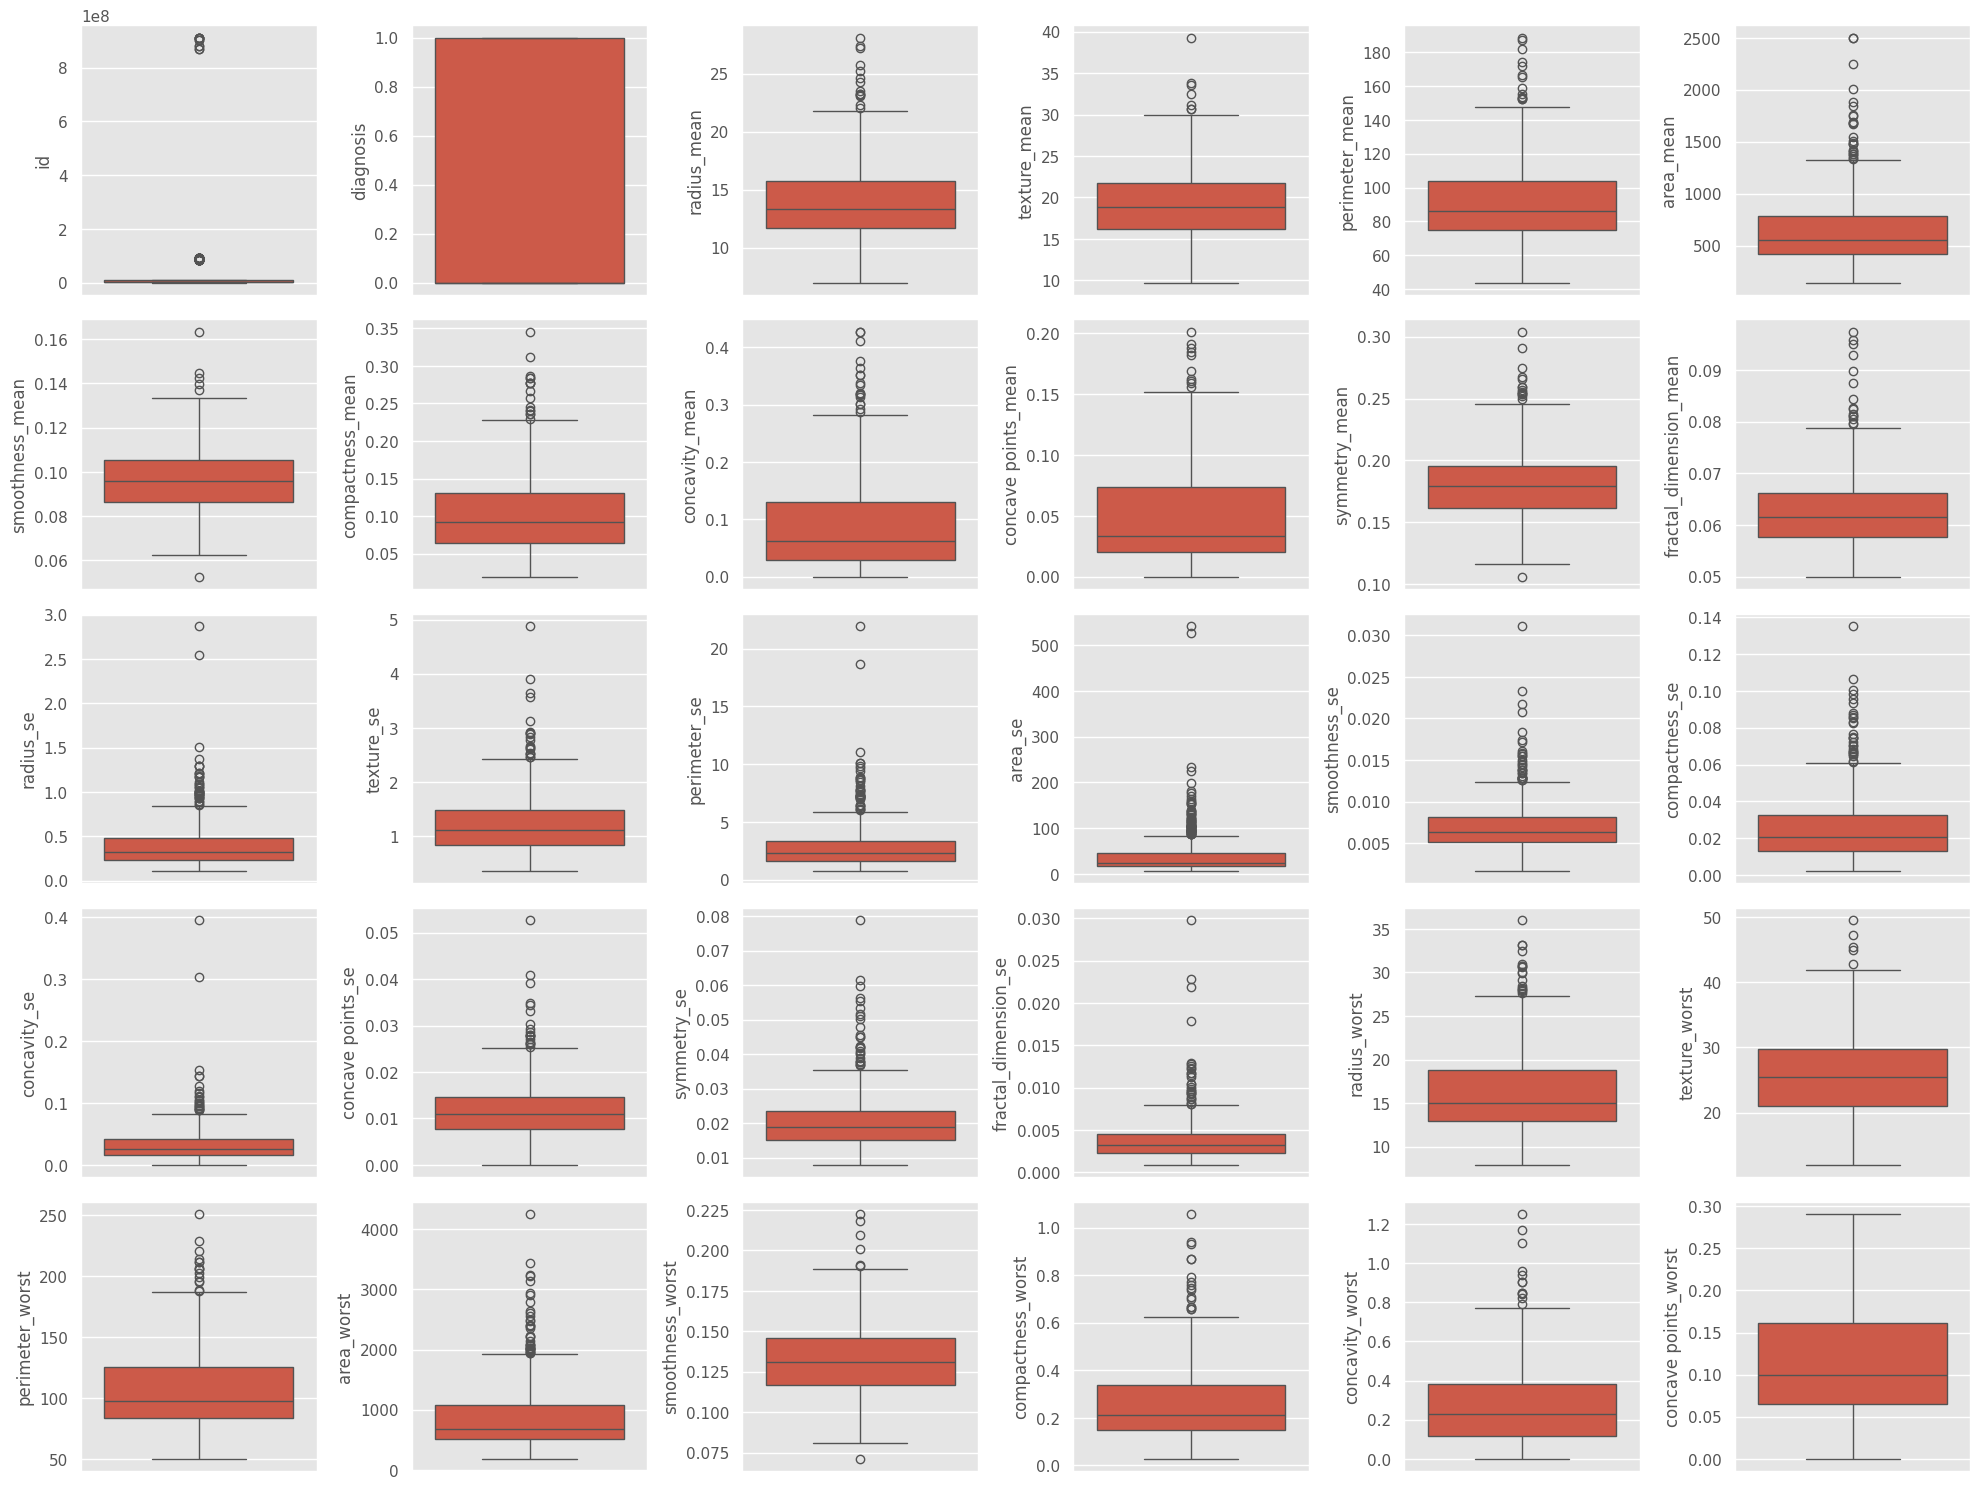

In [139]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
  if plotnumber<=30:
    ax = plt.subplot(5,6,plotnumber)
    sns.boxplot(df[column])
  plotnumber+=1


plt.tight_layout()
plt.show()


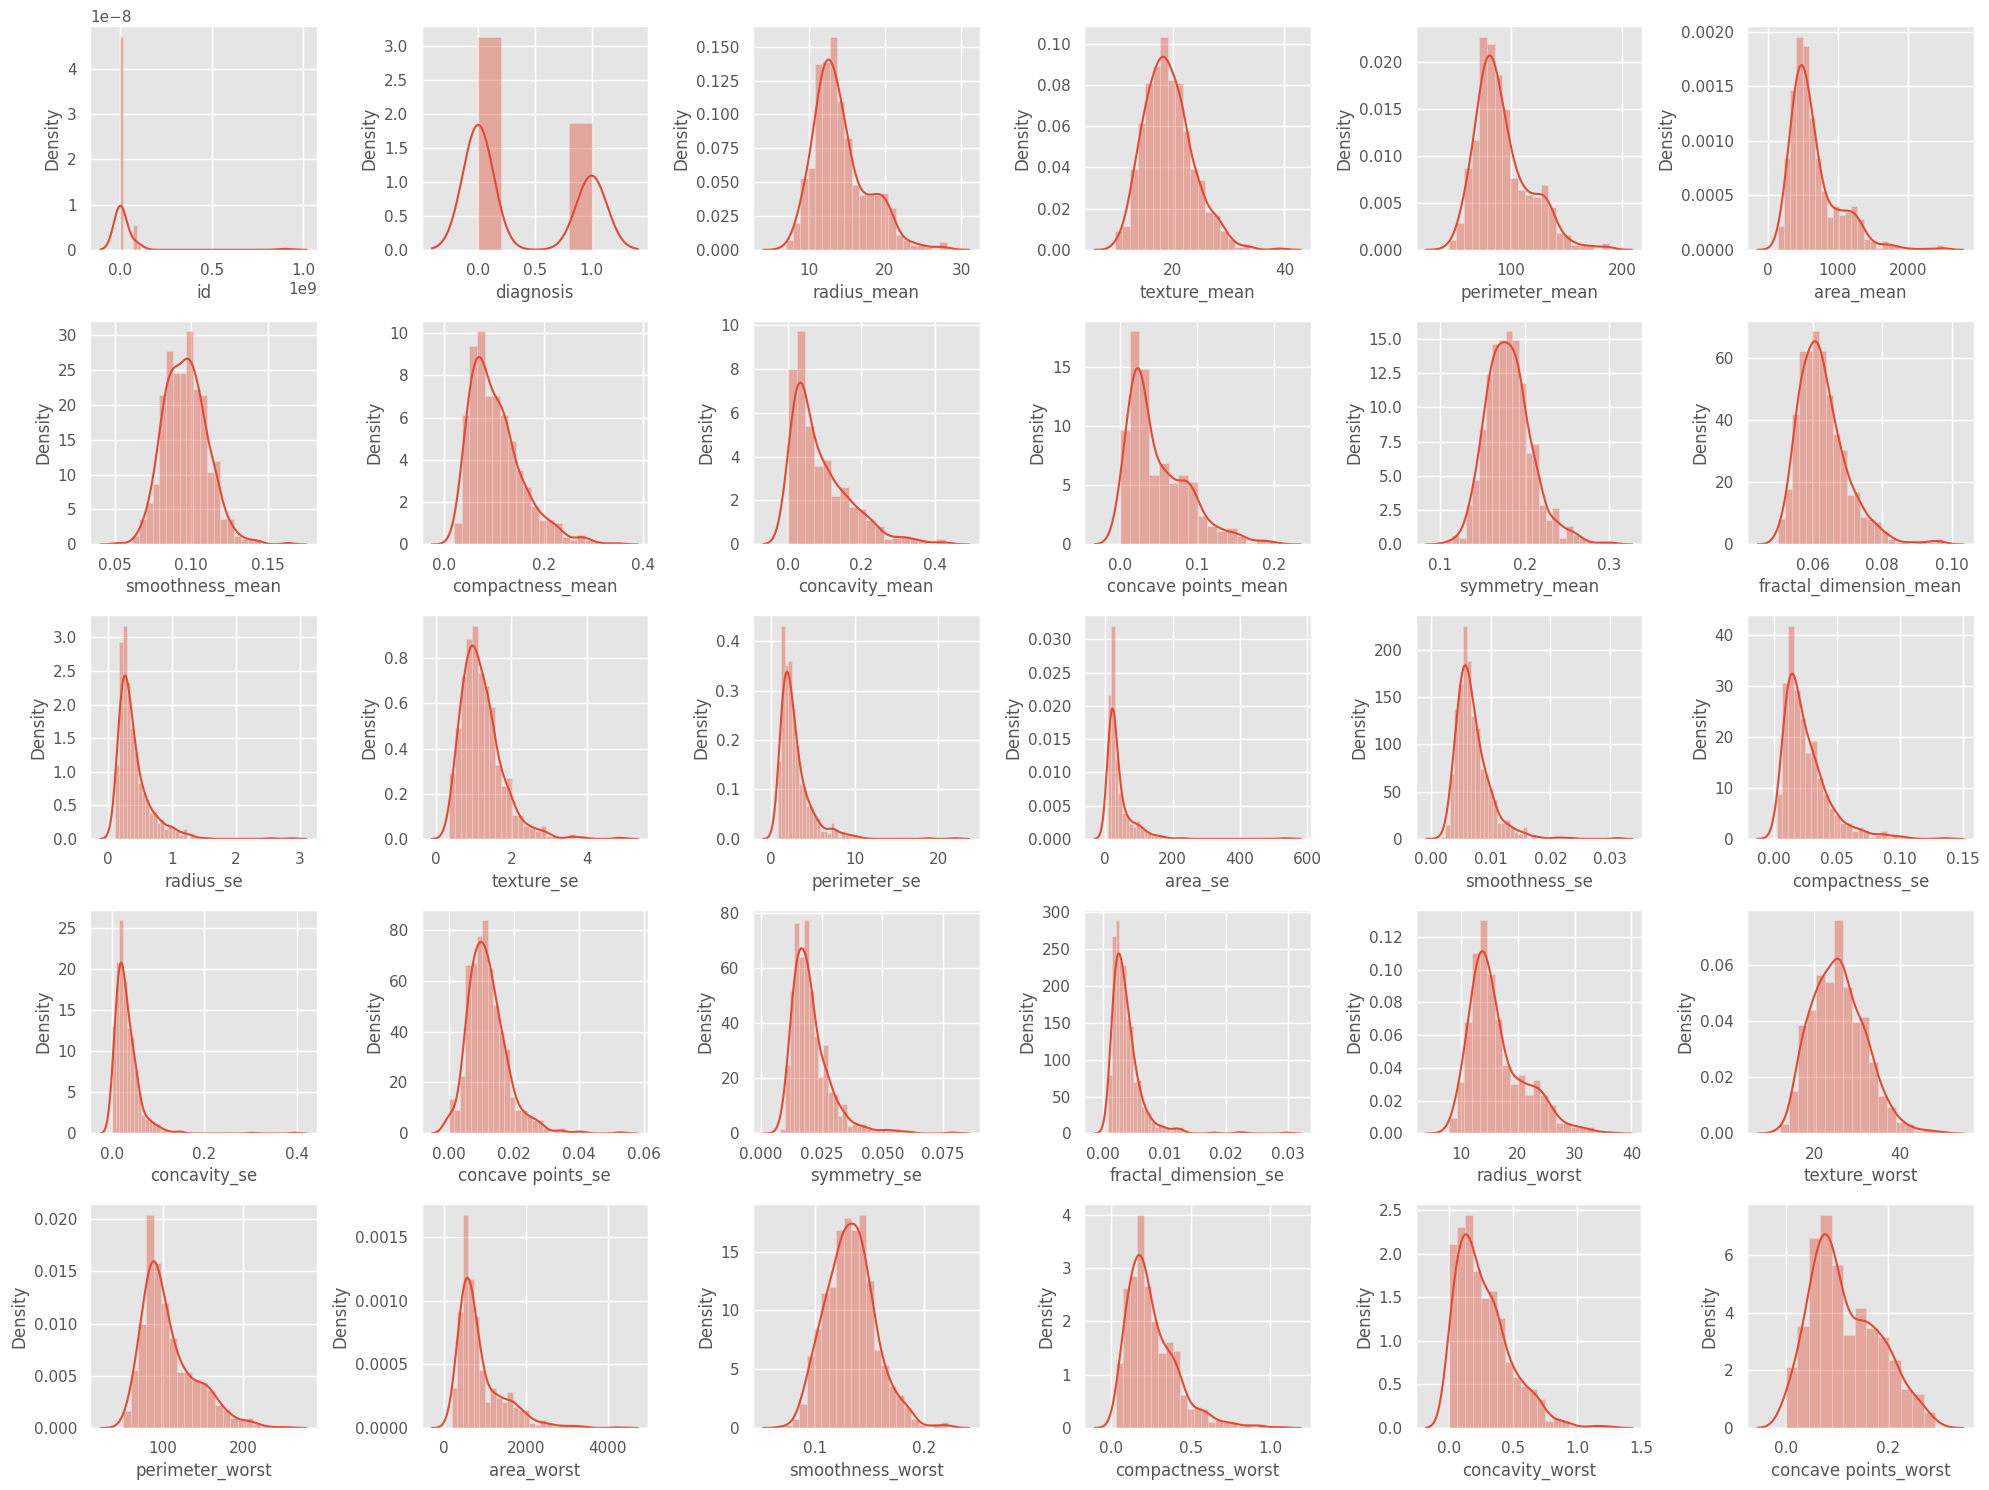

In [140]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
  if plotnumber<=30:
    ax = plt.subplot(5,6,plotnumber)
    sns.distplot(df[column])
  plotnumber+=1


plt.tight_layout()
plt.show()


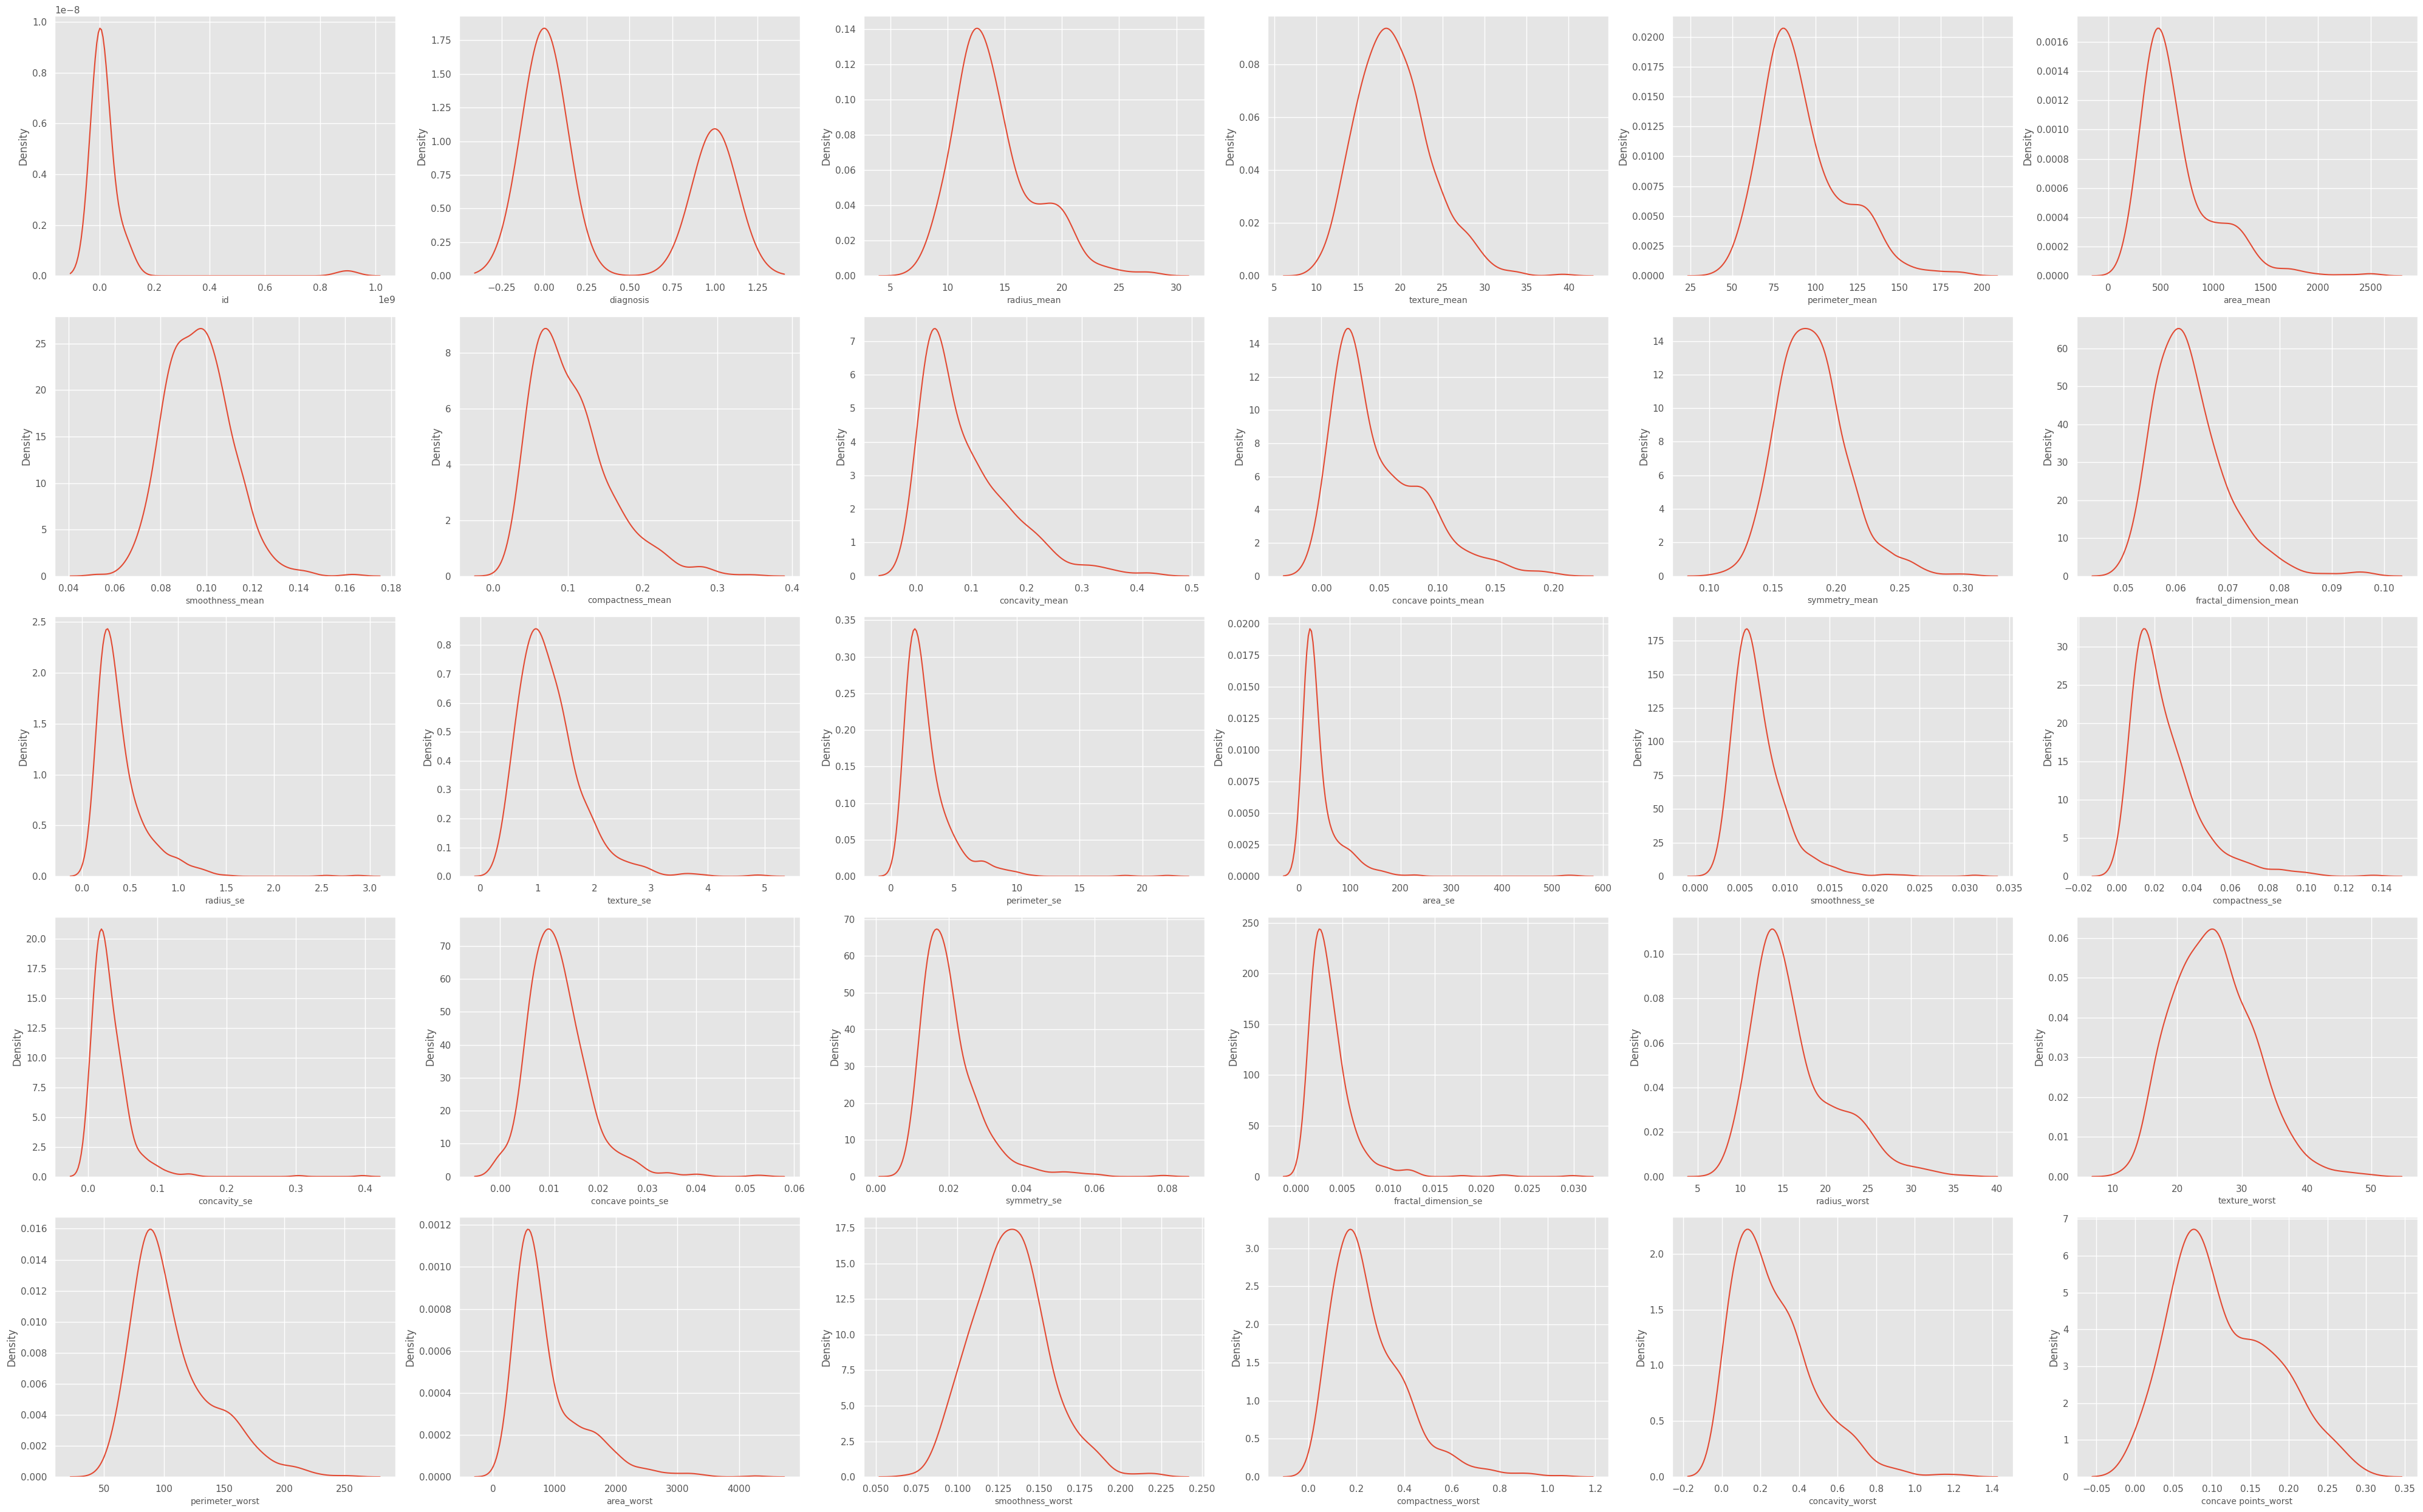

In [141]:
# density Graph
plt.figure(figsize=(40,25))
plotnumber = 1
for column in df:
  if plotnumber<=30:
    ax = plt.subplot(5,6,plotnumber)
    if df[column].dtype in ['int64', 'float64']: # Check if the column is numeric
        sns.kdeplot(df[column])
    else:
        sns.countplot(df[column]) # Use countplot for categorical data
    plt.xlabel(column, fontsize=10)
  plotnumber+=1


plt.tight_layout()
plt.show()

In [142]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


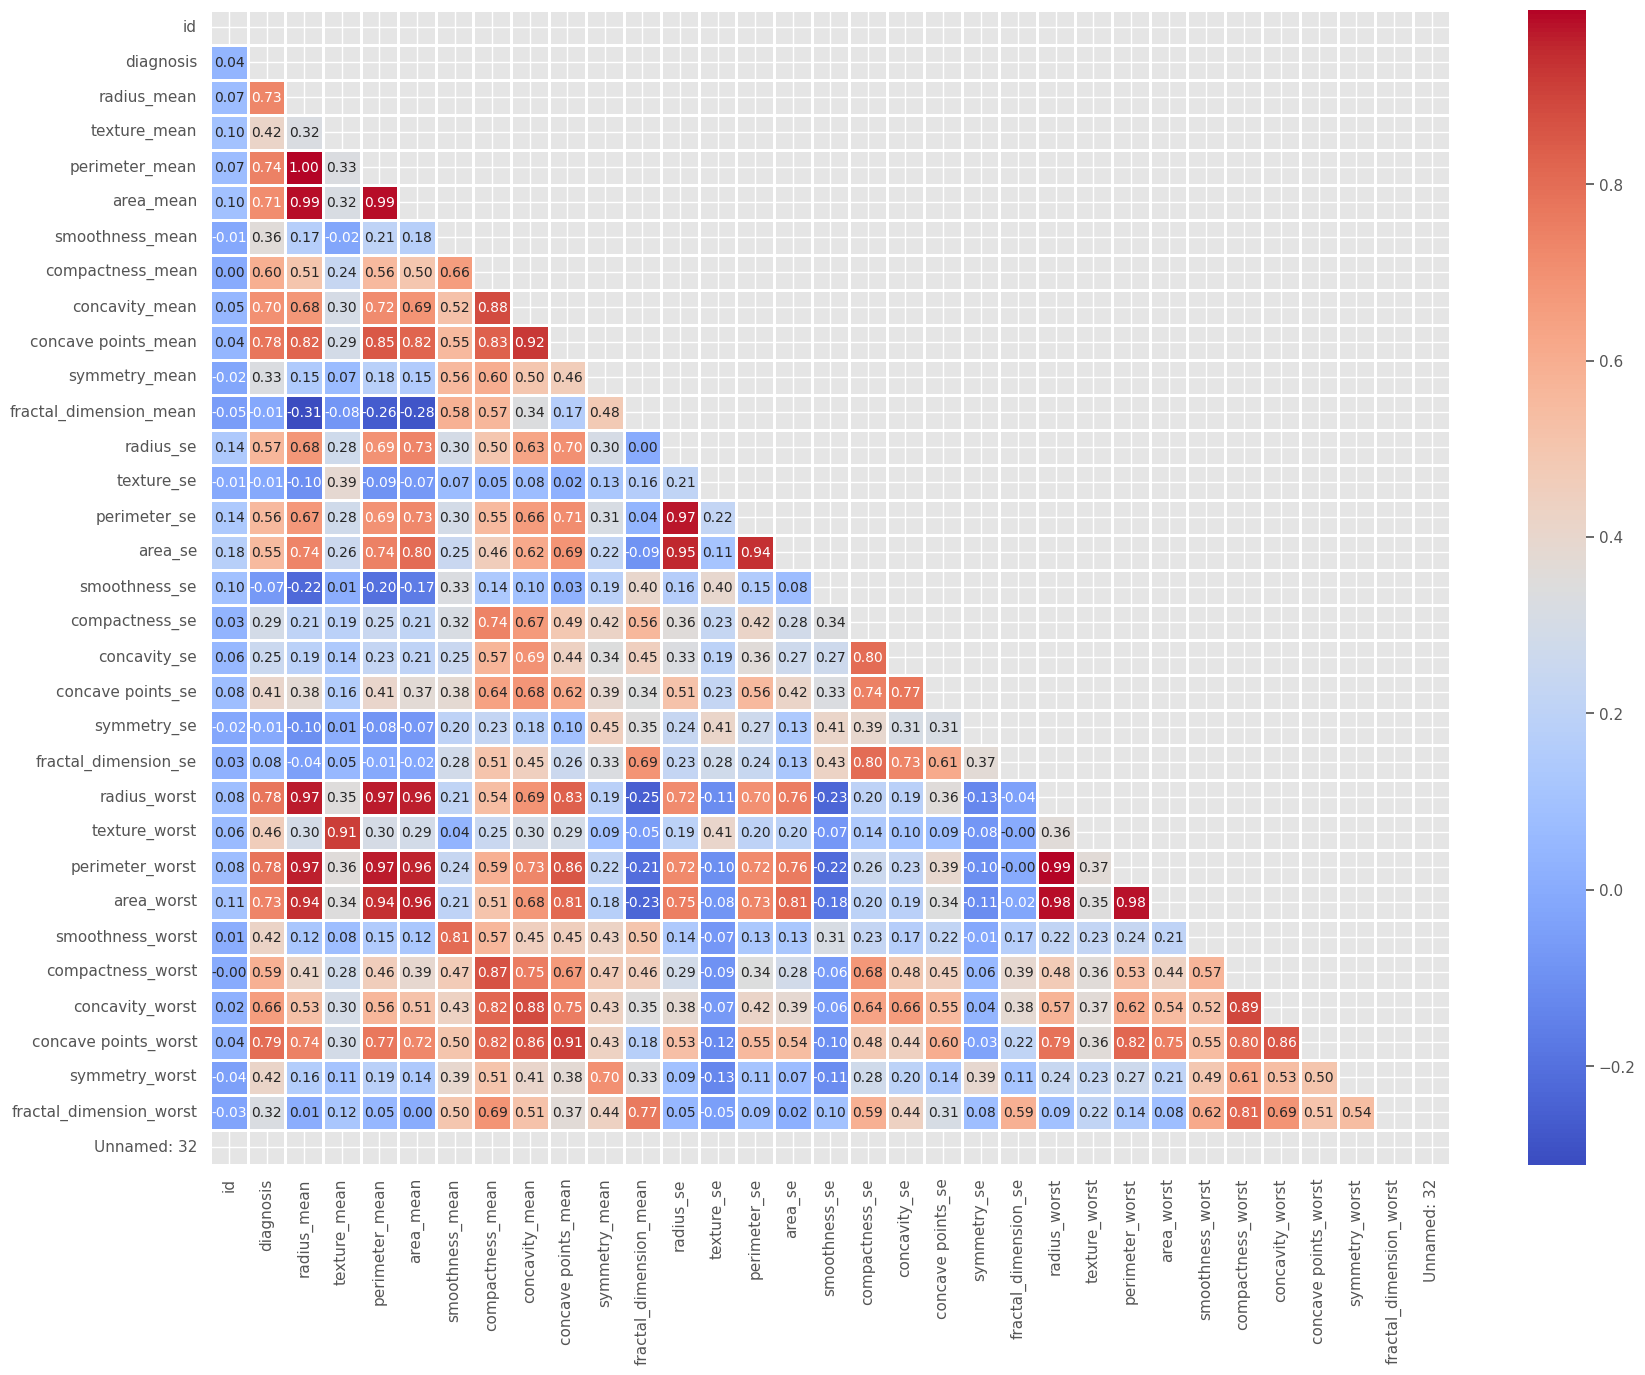

In [143]:
# heatmap

plt.figure(figsize=(20,15))
correlations = df.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=mask, linewidths=1, fmt = '.2f' )
plt.show()

In [144]:
# highly correlated feature
# multicollinarity



In [145]:
df.drop('id', axis=1, inplace=True)

In [146]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis=1)  # Remove the assignment here

In [147]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [148]:
df.shape

(569, 24)

In [149]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

we have 32 feature , reduced now 24 features

In [150]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [152]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
X_train.shape

(455, 23)

In [149]:
# Machine algo

**Logistic Regression**

In [155]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column

# Fit and transform on training data
X_train = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test = imputer.transform(X_test)

# Now, fit the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [156]:
y_pred = log_reg.predict(X_test)

In [157]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(log_reg.score(X_test, y_test))
print(log_reg.score(X_train, y_train))



0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544
0.989010989010989


**KNN**

In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [161]:
y_pred = knn.predict(X_test)

In [162]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))



0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
0.967032967032967


**SVM**

In [164]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability=True)

parameters = {
    'gamma':[0.001, 0.01, 0.1, 1],
    'C':[0.001, 0.05, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.05, 0.1, 1, 10, 15, 20],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [165]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [166]:
grid_search.best_score_

0.9781642512077294

In [167]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [168]:
y_pred = svc.predict(X_test)

In [169]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(svc.score(X_test, y_test))
print(svc.score(X_train, y_train))

0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771
0.989010989010989


**DT**

In [171]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

parameters = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best', 'random']
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=1, verbose=1)
grid_search_dt.fit(X_train, y_train)


Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [172]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'splitter': 'random'}

In [173]:
grid_search_dt.best_score_

0.9606280193236716

In [174]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=6, min_samples_split=9, splitter='random')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=6, min_samples_split=9,
                       splitter='random')

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))


0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9035087719298246
0.9516483516483516


**RFT**

In [176]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

parameters = {
    'n_estimators':[10,15,20,25,30],
    'criterion':['gini', 'entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'bootstrap':[True, False]
    }

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=1, verbose=1)
grid_search_rfc.fit(X_train, y_train)


Fitting 10 folds for each of 43200 candidates, totalling 432000 fits


KeyboardInterrupt: 

In [ ]:
grid_search_rfc.best_params_

In [ ]:
grid_search_rfc.best_score_

In [177]:
rfc = RandomForestClassifier(criterion='gini', max_depth=11, min_samples_leaf=6, min_samples_split=9, n_estimators=15, bootstrap=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=6, min_samples_split=9,
                       n_estimators=15)

In [178]:
y_pred = rfc.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(rfc.score(X_test, y_test))

0.9298245614035088
[[63  4]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088


**Grandient Boosting**

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss':['deviance', 'exponential'],
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'n_estimators':[100,150,200,250,300],
    'criterion':['friedman_mse', 'squared_error']
}

grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy', verbose=1)

In [181]:
grid_search_gbc.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'loss': 'exponential',
 'n_estimators': 150}

In [182]:
grid_search_gbc.best_score_

0.9758454106280194

In [183]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=1, loss='exponential', n_estimators=150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=150)

In [184]:
y_pred = gbc.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(gbc.score(X_test, y_test))
print(gbc.score(X_train, y_train))


0.9824561403508771
[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771
1.0


**XGclassifier**

In [186]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

parameters = {
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'n_estimators':[100,150,300],
    'booster':['gbtree', 'gblinear', 'dart'],
    'max_depth':[3,4,5,6,7],
    'objective':['binary:logistic', 'binary:logitraw', 'binary:hinge']
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=1, verbose=1)
grid_search_xgb.fit(X_train, y_train)


Fitting 10 folds for each of 540 candidates, totalling 5400 fits


KeyboardInterrupt: 

In [ ]:
grid_search_xgb.best_params_

In [ ]:
grid_search_xgb.best_score_

In [187]:
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=4, n_estimators=150, objective='binary:logistic')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [188]:
y_pred = xgb.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(xgb.score(X_test, y_test))
print(xgb.score(X_train, y_train))


0.9649122807017544
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544
1.0


In [190]:
model = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'RFT', 'GB', 'XGB'],
    'Score':[100*round(log_reg.score(X_test, y_test), 4), 100*round(knn.score(X_test, y_test), 4), 100*round(svc.score(X_test, y_test), 4), 100*round(dt.score(X_test, y_test), 4), 100*round(rfc.score(X_test, y_test), 4), 100*round(gbc.score(X_test, y_test), 4),
             100*round(xgb.score(X_test, y_test), 4)]
})

model.sort_values(by='Score', ascending=False)

,Model,Score
2,SVM,98.25
5,GB,98.25
0,Logistic Regression,96.49
6,XGB,96.49
1,KNN,95.61
4,RFT,92.98
3,DT,90.35


In [191]:
import pickle
pickle.dump(svc, open('brest_cancer.pkl', 'wb'))

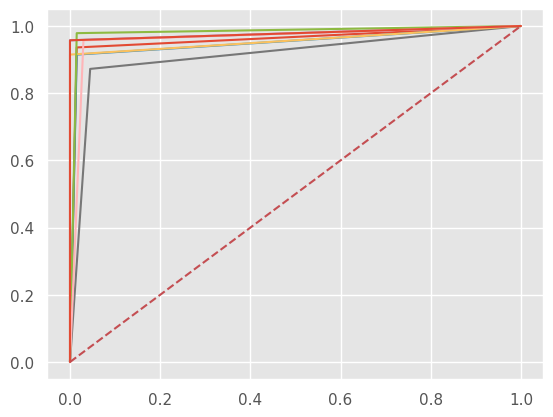

In [194]:
import matplotlib.pyplot as plt
from sklearn import metrics

# ... (rest of your code)

for model in models:
    model['model'].fit(X_train, y_train)
    y_pred = model['model'].predict(X_test)  # Remove [:,1] indexing
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr1, tpr1, label=f'{model["name"]} (AUC={auc:.2f})')

plt.plot([0,1], [0,1], 'r--') # Changed the line style to dashed
plt.show()

In [195]:
!pip install plotly
import plotly.graph_objects as go
from sklearn import metrics

# ... (rest of your code)

fig = go.Figure()

for model in models:
    model['model'].fit(X_train, y_train)
    y_pred = model['model'].predict(X_test)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    # Include the model name in the trace name
    fig.add_trace(go.Scatter(x=fpr1, y=tpr1, mode='lines', name=f'{model["name"]} (AUC={auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='red', dash='dash'), name='Random'))

fig.update_layout(
    title='ROC Curves',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

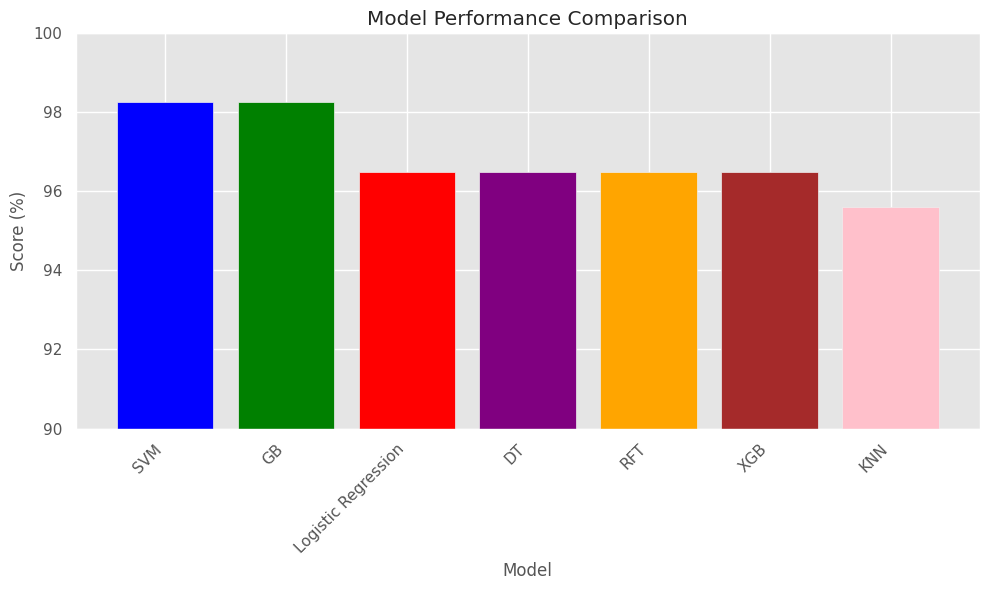

In [196]:
import matplotlib.pyplot as plt

model = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'RFT', 'GB', 'XGB'],
    'Score':[100*round(log_reg.score(X_test, y_test), 4), 100*round(knn.score(X_test, y_test), 4), 100*round(svc.score(X_test, y_test), 4), 100*round(dt.score(X_test, y_test), 4), 100*round(rfc.score(X_test, y_test), 4), 100*round(gbc.score(X_test, y_test), 4),
             100*round(xgb.score(X_test, y_test), 4)]
})

model.sort_values(by='Score', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(model['Model'], model['Score'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.title('Model Performance Comparison')
plt.ylim([90, 100]) # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [198]:
import sklearn
print(sklearn.__version__)

1.3.2
